<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

## Welcome Back, Mayor.  Hope you enjoyed your Bahamas "fact-finding" trip...
## I've been data mining while you were away and am thrilled to say:  
## You can have your cake, and eat it too ... by developing a single program to improve high school education outcomes and reduce drug abuse in the community.
## Data clearly shows that drug use accelerates rapidly in high school.
## At the same time, data shows that educational outcomes are correlated with opportunity.
## To make teens great again, let's provide all high schoolers with a city sponsored program of after-school SAT tutoring combined with drug awareness and education!  
## We can have them analyze data that will make them aware of the devastating impact of drug abuse -- they will learn analytical skills and life lessons at the same time! 
## Let's look at a couple summary data charts up front. Then we can dive into the details.

#### Package imports

In [14]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns # this was not in the project specs; added because needed below
import matplotlib.pyplot as plt # not in spec but needed

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [15]:
# details on all of this provided below
# load file
df_drug = pd.read_csv('drug-use-by-age.csv')

# clean data
object_list = (['cocaine-frequency','crack-frequency','heroin-frequency',
                'inhalant-frequency','oxycontin-frequency', 'meth-frequency'])
for column in object_list:
    df_drug[column] = df_drug[column].map(lambda x: np.nan if x == '-' else float(x))

df_drug['age-adjusted'] = df_drug['age'].map(lambda x: (
    (float(x[0:2])+float(x[3:]))/2 if '-' in x # average of range given
    else float(x[0:2]) if "+" in x # just 65 rather than 65+
    else float(x))) # float of all values with single item string
    

In [16]:
# import libraries
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

# create the plot
p = figure(plot_width=900, plot_height=600,
          x_axis_label='Age',
           y_axis_label='Percent Use',
          title='Percent Drug Use by Age')

# add multiple line glyph
p.line(x=df_drug['age-adjusted'], y=df_drug['alcohol-use'], 
       color='black', legend='Alcohol', line_width=5)
p.line(x=df_drug['age-adjusted'], y=df_drug['marijuana-use'], 
       color='maroon', legend='Marijuana', line_width=3)
p.line(x=df_drug['age-adjusted'], y=df_drug['pain-releiver-use'], 
       color='green', legend='Pain Reliever', line_width=2)
p.line(x=df_drug['age-adjusted'], y=df_drug['hallucinogen-use'], 
       color='olive', legend='Hallucingoen', line_width=1)
p.line(x=df_drug['age-adjusted'], y=df_drug['tranquilizer-use'], 
       color='navy', legend='Tranquilizer')
p.line(x=df_drug['age-adjusted'], y=df_drug['cocaine-use'], 
       color='purple', legend='Cocaine')
p.line(x=df_drug['age-adjusted'], y=df_drug['stimulant-use'], 
       color='teal', legend='Stimulant')
p.line(x=df_drug['age-adjusted'], y=df_drug['oxycontin-use'], 
       color='grey', legend='Oxycontin')
p.line(x=df_drug['age-adjusted'], y=df_drug['meth-use'], 
       color='lime', legend='Meth')
p.line(x=df_drug['age-adjusted'], y=df_drug['inhalant-use'], 
       color='red', legend='Inhalant', line_width=2.5)
p.line(x=df_drug['age-adjusted'], y=df_drug['crack-use'], 
       color='blue', legend='Crack')
p.line(x=df_drug['age-adjusted'], y=df_drug['sedative-use'], 
       color='fuchsia', legend='Sedative')

# legend location
# p.legend.location = "top_left"


# output the plot in the jupyter notebook
output_notebook()

# show the plot
show(p)

Loading BokehJS ...

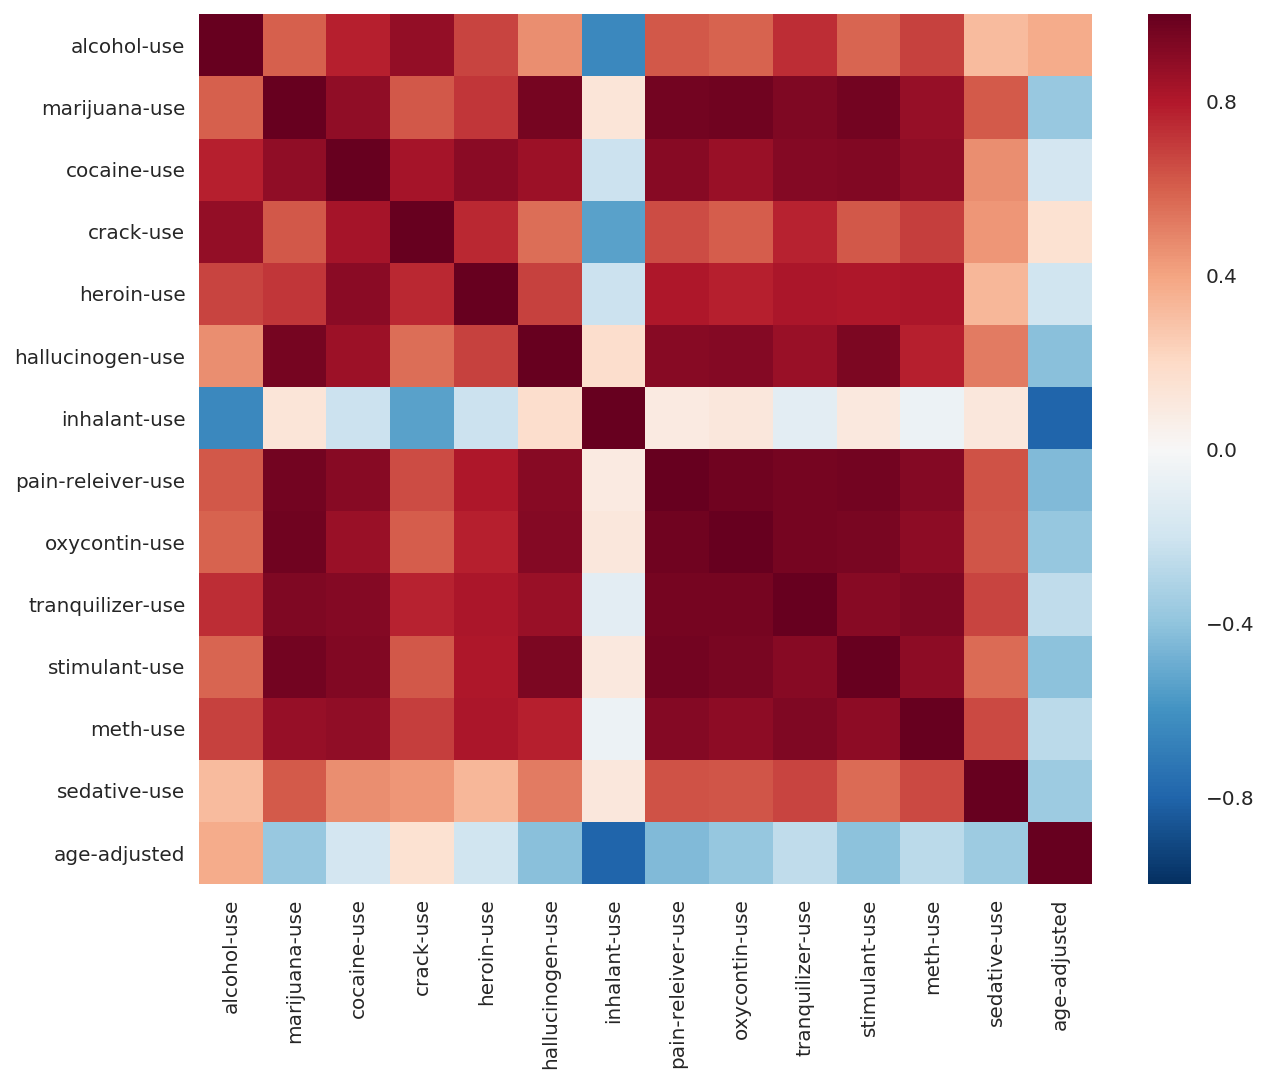

In [17]:
# create a new dataframe with drug use variables only
df_drug_use = df_drug.iloc[:,[2,4,6,8,10,12,14,16,18,20,22,24,26,28]]

# cross correlation matrix
corr = df_drug_use.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [18]:
# Load file
df = pd.read_csv('sat_scores.csv')

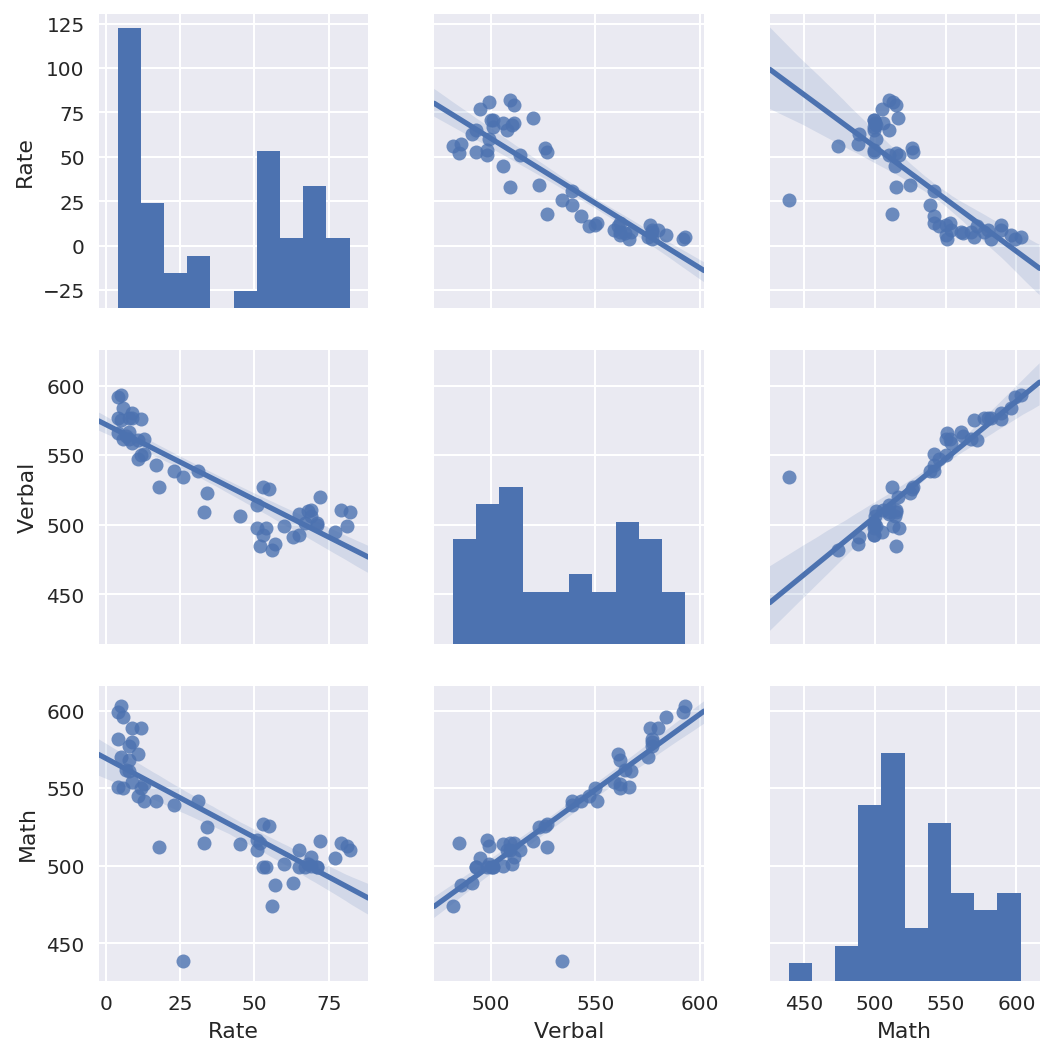

In [19]:
# pairplot data
plt.figure(figsize=(10, 8))
sns.pairplot(df, kind='reg')

## Now, that we have visualized the summary data, let's take a look at the details!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

### In addition to loading the file into a dictionary, we look at the print out. We can see four key value pairs, with the keys being 'Verbal', 'State', 'Rate' and 'Math'.

In [21]:
# http://stackoverflow.com/questions/14091387/creating-a-dictionary-from-a-csv-file
# import csv # already done at top of notebook
# class csv.DictReader(csvfile, fieldnames=None, restkey=None, restval=None, dialect='excel', *args, **kwds)
# https://docs.python.org/2/library/csv.html
with open('sat_scores.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    sat_dict = {}
    for row in reader:
        for column, value in row.iteritems():
            sat_dict.setdefault(column, []).append(value)
print(reader)
print(type(reader))
print(type(sat_dict))
print(sat_dict)

<csv.DictReader instance at 0x7fa490a7bab8>
<type 'instance'>
<type 'dict'>
{'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566', '506'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11'

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

## We see three key differences between loading from file and inputting a dictionary:
#### 1. Loading directly from the file takes one line of code; whereas, creating a dictionary requires many lines of code.
#### 2. Loading directly maintains the column order of the file; whereas, a dictionary is not ordered so columns can shift positions.
#### 3. The values from the dictionary are of type str not float, so, we would need to write code to convert types.
## Bottom line: pd.read_csv() requires less coding and produces a better result.

In [209]:
# This takes the dictionary from above and builds a DataFrame
# DataCamp: Intermediate Python for Data Science Part 2
df_from_dict = pd.DataFrame(sat_dict)
df_from_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
Math      52 non-null object
Rate      52 non-null object
State     52 non-null object
Verbal    52 non-null object
dtypes: object(4)
memory usage: 1.7+ KB


In [210]:
# we see Math, Rate and Verbal are strings when we expected int or float
# so, we can convert each column to numeric one by one
df_from_dict['Math'] = pd.to_numeric(df['Math'])
df_from_dict['Rate'] = pd.to_numeric(df['Rate'])
df_from_dict['Verbal'] = pd.to_numeric(df['Verbal'])
df_from_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
Math      52 non-null int64
Rate      52 non-null int64
State     52 non-null object
Verbal    52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [212]:
# This loads the csv file directly into a dataframe
df = pd.read_csv('sat_scores.csv')

### The next two cells and corresponding output highlight the data types of each variable in the dataframes.  Here is where we see the need to convert the objects in the dataframe from dictionary (df_from_dict) to strings.

In [208]:
df_from_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
Math      52 non-null int64
Rate      52 non-null object
State     52 non-null object
Verbal    52 non-null object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [22]:
# a simple and helpful way to visualize what we are working with
# is to uncomment this next line of code
# df

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


### State is a list of states with abbreviations.  With 52 row values, we discover extra "states" of "DC" and "All".
### Rate is the percent of the population who takes the test. Thanks to Wai Kin for help on this variable: http://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate
### Verbal and Math are the SAT scores, presumably each on a scale of 200 to 800.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

### Rate has a "camel hump"  or "bar bell" distribution with left concentration; no middle; right concentration. 
### Looks like we have an outlier on the low side for Math: is this data valid?  We will explore outliers lated.


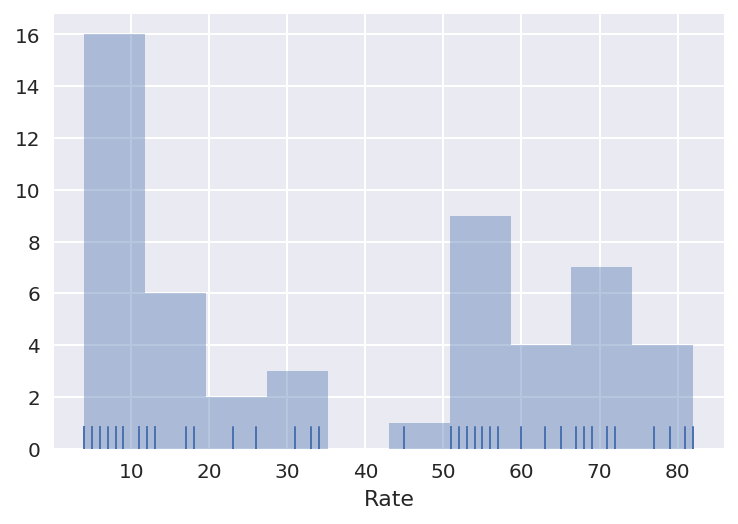

In [177]:
# (seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, 
# hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, 
# vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

# come back to this and play around with different argument values

sns.distplot(df['Rate'], bins=10, kde=False, rug=True)

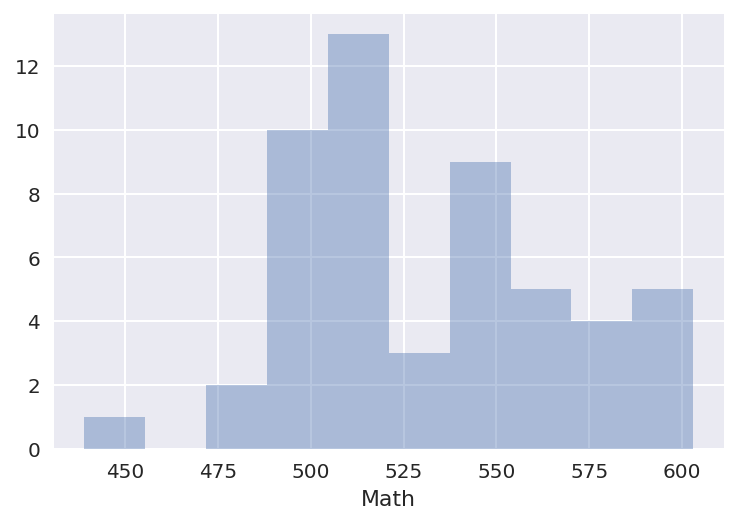

In [43]:
sns.distplot(df['Math'], bins=10, kde=False)

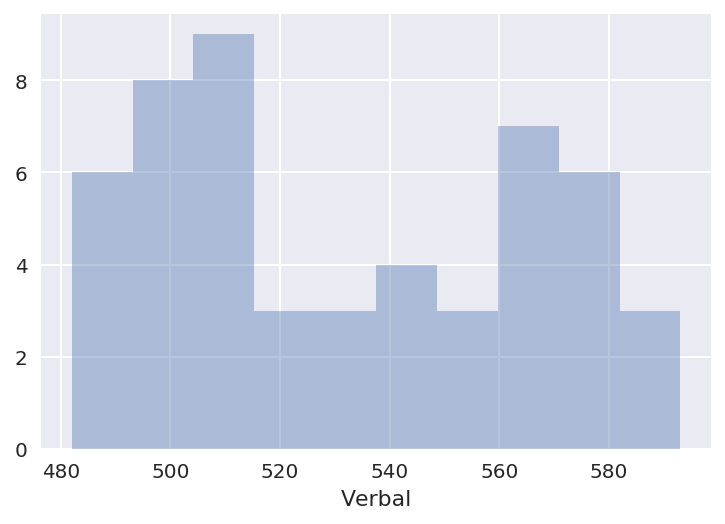

In [44]:
sns.distplot(df['Verbal'], bins=10, kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

### This is a repeat of the summary chart from above. The charts three charts in the lower left location of the 3 by 3 grid of charts tell most of the story.  Rate is negatively correlated with both Verbal and Math; Verbal and Math are positively correlated.

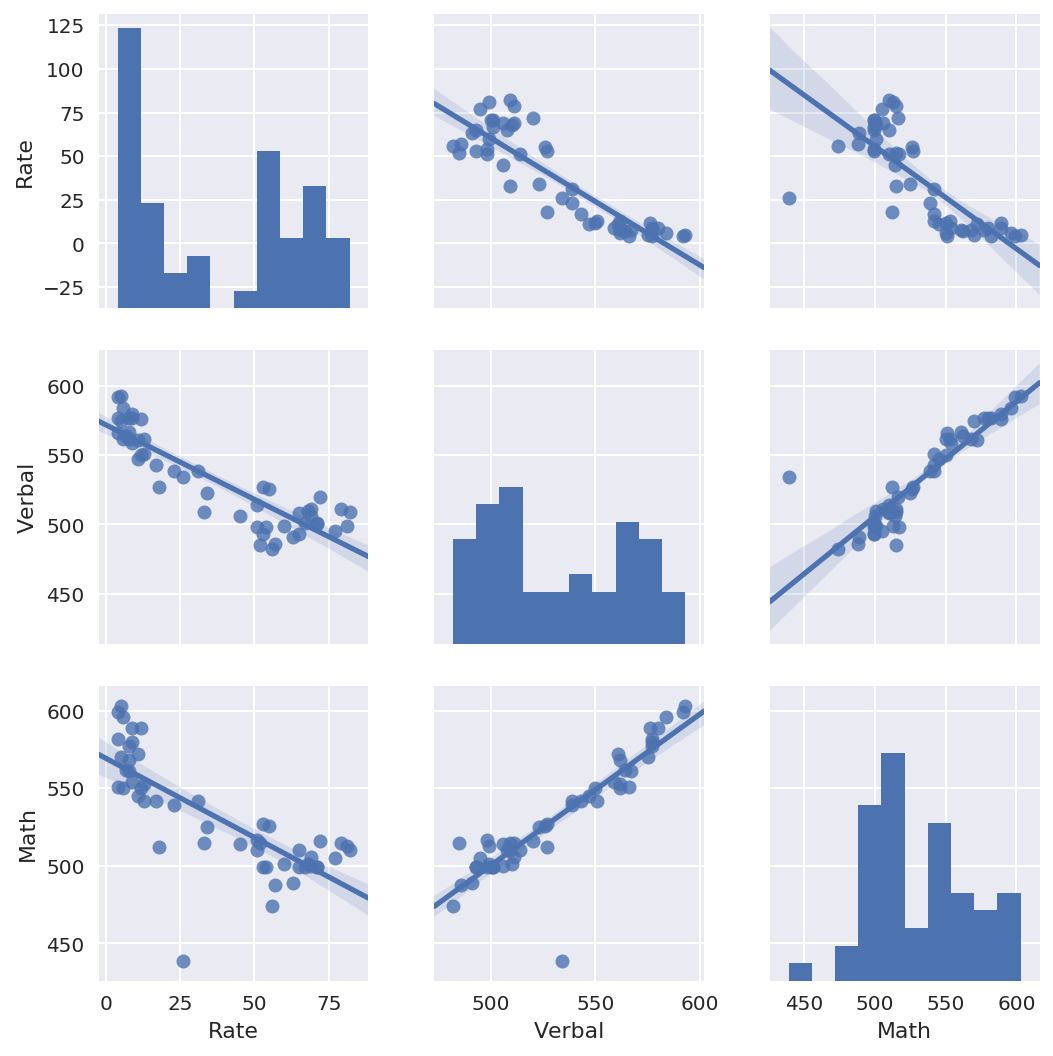

In [65]:
# seaborn.pairplot(data, hue=None, hue_order=None, palette=None, 
# vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', 
#markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)

# kind = 'reg' is what creates the lines and shading
sns.pairplot(df, kind='reg')

In [66]:
# Next step:  do a scatter plot with verbal on x, math on y and bubble size equal rate
# then label outliers that are big bubbles with big scores
# look at DataCamp chart with population size, wealth and health
# would be great to have single chart summarizing the data and pointing out under/over achievers with labels
# maybe create a new variable equal to math+verbal and scatter versus rate; label under/overachievers
# then drill down on under/over by subject area

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

### Although it is interesting to try out this visualization, it's not as intuitive a display as earlier.  Once again, it shows the high correlation between Verbal and Math and the outler in Math.

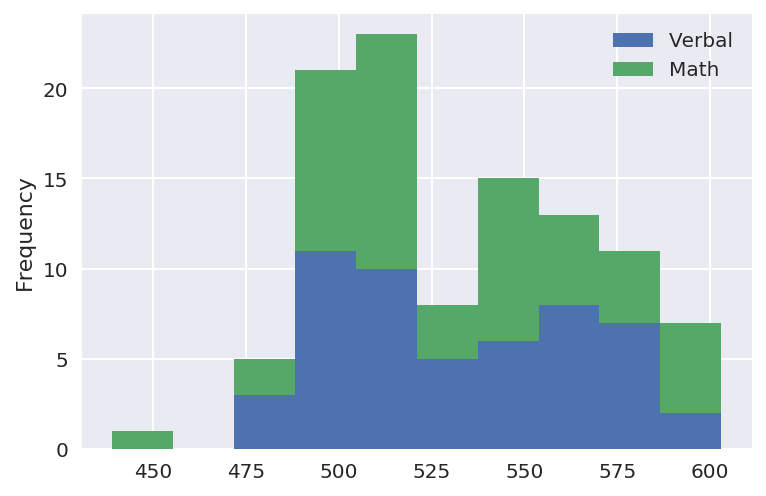

In [46]:
df[['Verbal','Math']].plot.hist(stacked=True, bins=10)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

This comes from "basic-eda-walkthrough-solutions.ipynb":

Here we will use the seaborn package to plot boxplots of the variables we have identified as potentially having outliers.

Some notes on seaborn's boxplot keyword argument options:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent

There are more keyword arguments available but those are most relevant for now.

### Here, we have another way of looking at the spread of the data and the similarity of distributions.

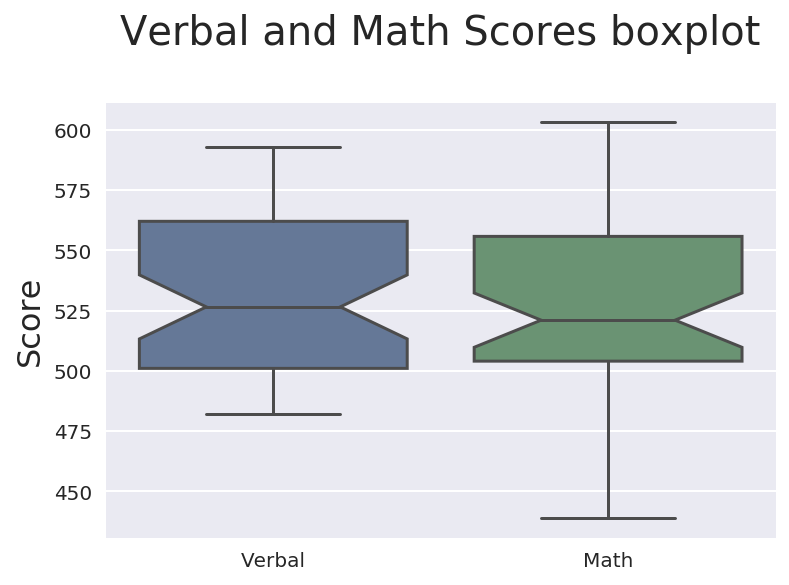

In [213]:
# Need to edit this code to get Math and Verbal on same boxplot in seaborn
# Math Score Boxplot
df.Verbal_Math = df[[]]
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(df[['Verbal','Math']], orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('Score', fontsize=16)
ax.set_title('Verbal and Math Scores boxplot\n', fontsize=20)

plt.show()

### Another style of boxplots...

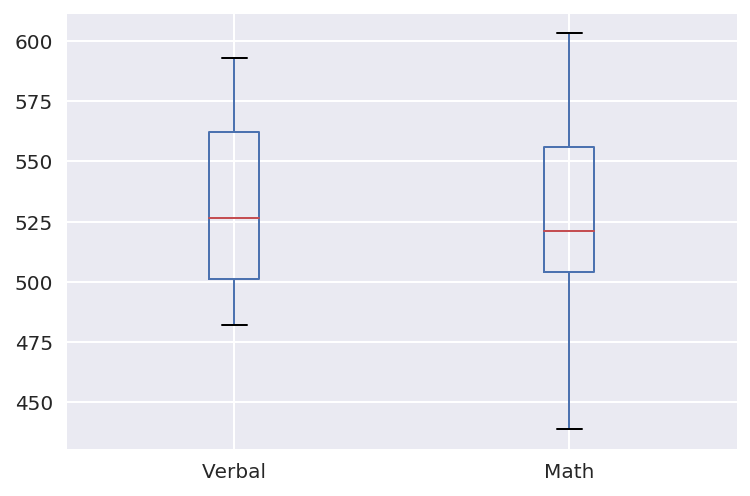

In [214]:
# Boxplot can be drawn calling Series.plot.box() and DataFrame.plot.box(), 
# or DataFrame.boxplot() to visualize the distribution of values within each column.

df[['Verbal','Math']].boxplot()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


### The first attempt with all three boxplots on the same chart doesn't seem too helpful.  The Rate variable has a different range of values compared to Verbal and Math.

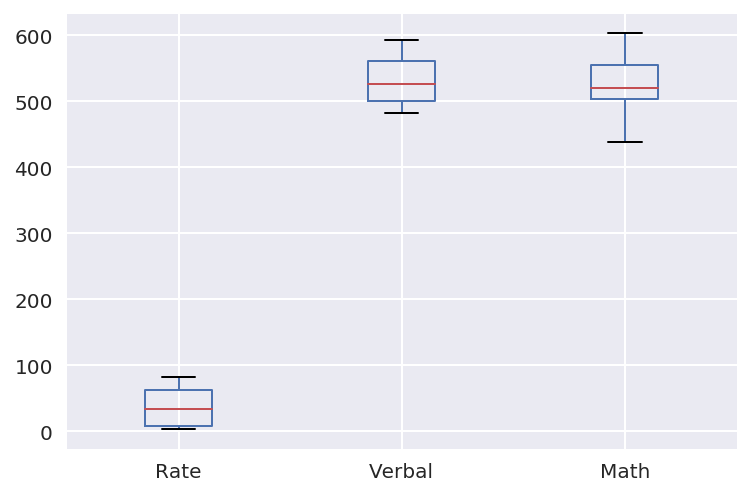

In [216]:
df.boxplot()

### If we try to fix the problem by creating new variable equal to Rate times ten, this fails.  So, we are going to need to standardize the values in the subsequent attempt.

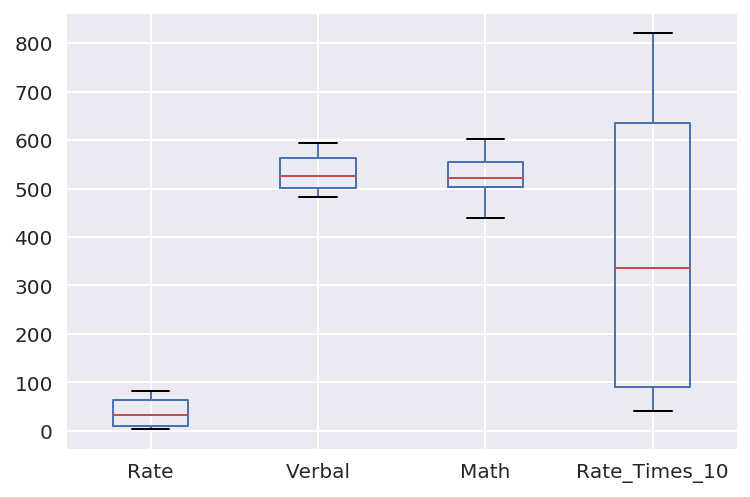

In [24]:
df['Rate_Times_10'] = df['Rate'] * 10
df.boxplot()

In [25]:
# obviously, Rate_Times_10 makes no sense
# so, let's drop if from the DataFrame. Let's also drop State
del df['Rate_Times_10']
del df['State']
df.head(2)

,Rate,Verbal,Math
0,82,509,510
1,81,499,513


### The following few paragraphs come from "basic-eda-walkthrough-solutions.ipynb":

### Standardizing variables

Rescaling variables is very common, and sometimes essential. For example, when we get to regularization of models the rescaling procedure becomes a requirement before fitting the model.

Here we'll rescale the variables using a procedure called "standardization", which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1.

Standardization is not complicated:

    standardized_variable = (variable - mean_of_variable) / std_dev_of_variable
    
Note: Nothing else is changed about the distribution of the variable. It doesn't become normally distributed.

### Standardize all of the columns and re-create the boxplot

---

Pandas DataFrames make it extremely easy to standardize the columns all at once. You can standardize the data like so:

```python
boston_norm = (boston - boston.mean()) / boston.std()
```

Create a standardized version of the data and recreate the boxplot. Now you can better examine the differences in the shape of distributions across our variables.

In [26]:
# this simple line of code standardizes the values
df_norm = (df - df.mean()) / df.std()

### Standardizing the values allows us to examine the differences in distributions more easily.  We can visualize the magnitude of the outliers on both side of the Math distribution, with the minimum value being more of an outlier than the maximum value.

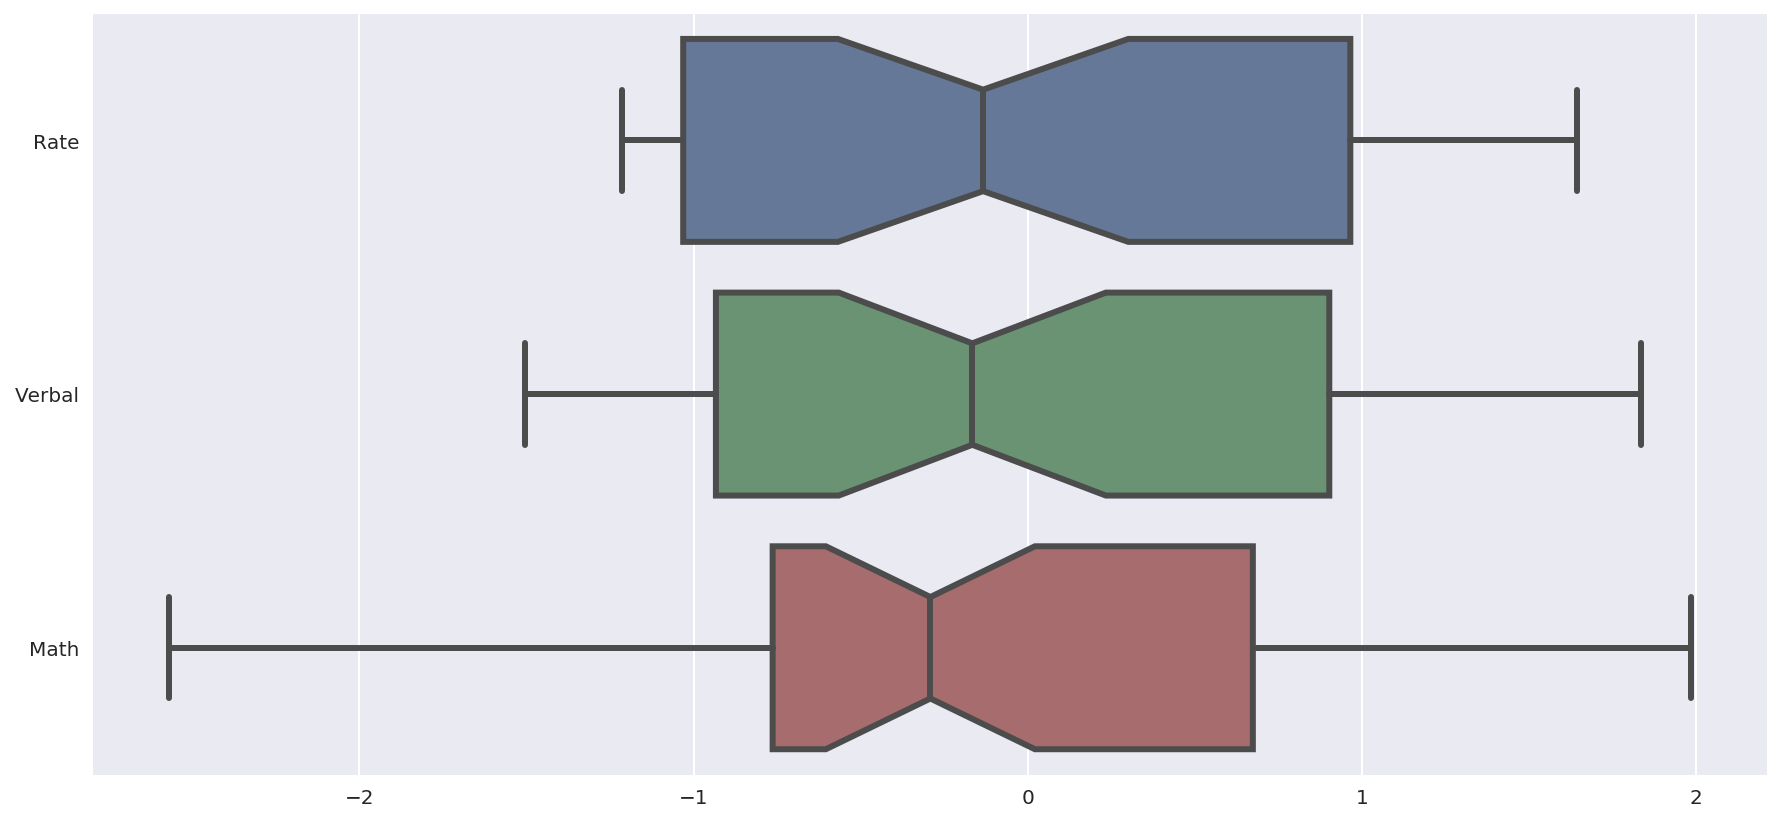

In [28]:
fig = plt.figure(figsize=(15, 7))
ax = fig.gca()

ax = sns.boxplot(data=df_norm, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




### 24 States are above the mean Verbal Score.  This is slightly less than half the states.  We have to be careful about not drawing too strong of a conclusion about the skew or normalcy of the data based on this single data point. The earlier histograms provided better insight into the distribution of scores.

In [36]:
# need to re-read the data, since we cut the State variable above
df = pd.read_csv('sat_scores.csv')
print(len(df[df['Verbal'] > df['Verbal'].mean()]), 'states are above the mean')

(24, 'states are above the mean')


In [37]:
# another approach. create a new df, then count number in column
df_Verbal_Strong = df[df['Verbal'] > df['Verbal'].mean()]
df_Verbal_Strong['State'].count()

24

In [38]:
# print out the states above the mean
df_Verbal_Strong['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

### There are 26 states that have verbal scores greater than the median of Verbal scores across states.
### This is 2 more than the 24 with verbal scores greater than the mean of Verbal scores across states.
### The median of 526.5 is less than the mean of 532.0.

In [39]:
df_Verbal_Strong_Median = df[df['Verbal'] > df['Verbal'].median()]
df_Verbal_Strong_Median['State'].count()

26

In [40]:
df['Verbal'].median()

526.5

In [41]:
df['Verbal'].mean()

532.01923076923072

### Here is the list of states above the median.  Not too many in the Northeast!  Kids in the states with high cows to people ratios seem to score better.  Next step is to put the scores on a map of the US to visualize the data more easily.

In [42]:
df_Verbal_Strong_Median

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


### Please forgive me Mayor, but these next lines of code were just an experiment.  I found two ways to sort data in the Pandas DataFrame, one using the logical_and method and one using the '&' boolean operator.  Way too in the weeds for an important person like you!

In [43]:
# experimenting with np.logical_and versus &
# looking for states less than median greater than mean
df[(df['Verbal'] > df['Verbal'].median()) & (df['Verbal'] < df['Verbal'].mean())]

,State,Rate,Verbal,Math
19,WA,53,527,527
29,WV,18,527,512


In [44]:
# experimenting with np.logical_and versus &
# looking for states less than median greater than mean
df[np.logical_and(df['Verbal'] > df['Verbal'].median(), df['Verbal'] < df['Verbal'].mean())]

,State,Rate,Verbal,Math
19,WA,53,527,527
29,WV,18,527,512


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [45]:
df['Verbal_Minus_Math'] = df['Verbal'] - df['Math']

In [46]:
df.head()

,State,Rate,Verbal,Math,Verbal_Minus_Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [47]:
# df_better_Verbal = created by looking at all cases where the value of the column
# Verbal_Minus_Math in the original df is greater than zero,  We then apply the method
# sort_values to the column "Verbal_Minus_Math and sort descending
# the [:10] at the end is splicing the df to just the first 10 rows 
df_better_Verbal = df[df['Verbal_Minus_Math'] > 0].sort_values('Verbal_Minus_Math', ascending=False)[:10]
# df_better_Verbal
df_better_Verbal.head(3)

,State,Rate,Verbal,Math,Verbal_Minus_Math
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [48]:
# change to <0 and ascending = True
df_better_Math = df[df['Verbal_Minus_Math'] < 0].sort_values('Verbal_Minus_Math', ascending=True)[:10]
df_better_Math.head(3)

,State,Rate,Verbal,Math,Verbal_Minus_Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


#### The correlation matrix is a grid showing the correlation coefficients between variables.  
#### The correlation coefficients are equal to the covariance divided by the sum of the standard deviations.  
#### In this case, we see that rate is negatively correlated with Verbal and Math scores.  That is, when the rate increases, the SAT scores decrease.   
#### In states with a low percentage of the population taking the test, it's likely the most motivated students with the highest income and resources to prepare will take the test. Math and Verbal scores are positively correlated.  
#### In all cases, the absolute value of the correlation is high (between 0.77 and 0.89) meaning the relationships are strong.

In [49]:
df.corr()

,Rate,Verbal,Math,Verbal_Minus_Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal_Minus_Math,-0.101412,0.052600,-0.388219,1.000000


In [50]:
# let's get rid of the Verbal_Minus_Math column
del df['Verbal_Minus_Math']

            Rate    Verbal      Math
Rate    1.000000 -0.886432 -0.773746
Verbal -0.886432  1.000000  0.899871
Math   -0.773746  0.899871  1.000000


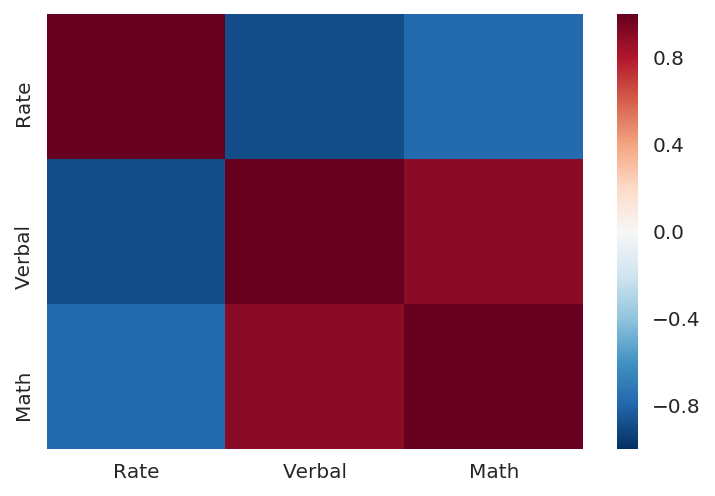

In [51]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

#### Count: 52 is the number of values in each column.
#### Mean: 37, 532 and 532 are the average of the values in each column.
#### Std:  27, 33 and 36 are the standard deviation of the values in each column.  If we compare the STD to the mean, we can see greater relative variance with Rate versus Verbal and Math.
#### Min: The minimum value in each column.  We see math has a minimum which appears to be an outlier.  (Tested mathematically in another question).
#### 25%: the value at the bottom 25% of ordinal rank
#### 50%: the median value
#### 75%: the value at the top 25% of ordinal rank
#### Max:  The maximum value in each column.

In [53]:
df.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

#### In the "basic-eda-walkthrough" notebook, we learned the following:
#### "The covariance is a measure of "relatedness" between variables. It is literally the sum of deviations from the mean of  XX  times deviations from the mean of  YY adjusted by the sample size  NN."
#### "Covariance is not very interpretable. The values are difficult to read because they are relative to the variance of the variables."  We can see this in the matrix below, as the values are quite large and hard to explain in relative terms.
#### "A much more common metric, and one directly calculable from the covariance, is the correlation."  It is calcuated by dividing the covariance by the sum of the standard deviatinos of XX and YY.  For shorthand, we can convert the .899871 correlation coefficient between Math and Verbal to "about 90% correlation".

In [55]:
# Covariance Matrix
df.cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


In [56]:
# Correlation Matrix
df.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


### This comes from "basic-eda-walkthrough-solutions.ipynb":

### Covariance and correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.

Below is the formula for the covariance between two variables $X$ and $Y$:

#### 11.A Covariance

Given sample size $N$ variables $X$ and $Y$, with means $\bar{X}$ and $\bar{Y}$:

### $$ \text{covariance}(X, Y) = \sum_{i=1}^N \frac{(X - \bar{X})(Y - \bar{Y})}{N}$$

The covariance is a measure of "relatedness" between variables. It is literally the sum of deviations from the mean of $X$ times deviations from the mean of $Y$ adjusted by the sample size $N$.

Code the covariance between `pct_underclass` and `home_median_value` below by hand. Verify that you got the correct result using `np.cov()`. Set the keyword argument `bias=True` in `np.cov()` to have it use the same covariance calculation.

Note: `np.cov` returns a covariance _matrix_, which will be each values covariance with itself and the other variable in matrix format.

#### Correlation

Covariance is not very interpretable. The values are difficult to read because they are relative to the variance of the variables.

A much more common metric, and one directly calculable from the covariance, is the correlation.

Again, let $X$ and $Y$ be our two variables, with covariance $cov(X, Y)$ that we calculated above:

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

Calculate the correlation between `pct_under` and `med_value` by hand below. Check that it is the same as `np.corrcoef()` with `bias=True`:

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [58]:
df_drug = pd.read_csv('drug-use-by-age.csv')

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [59]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

### With more columns than rows, it's helpful to visualize the data by transposing the DataFrame and glancing through it to see what we have.  When we do this, we can see that we need to clean some of the data by converting the age values and the '-' values.

In [61]:
df_drug.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
n,2798,2757,2792,2956,3058,3038,2469,2223,2271,2354,4707,4591,2628,2864,7391,3923,2448
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75,67.2,49.3
alcohol-frequency,3,6,5,6,10,13,24,36,48,52,52,52,52,52,52,52,52
marijuana-use,1.1,3.4,8.7,14.5,22.5,28,33.7,33.4,34,33,28.4,24.9,20.8,16.4,10.4,7.3,1.2
marijuana-frequency,4,15,24,25,30,36,52,60,60,52,52,60,52,72,48,52,36
cocaine-use,0.1,0.1,0.1,0.5,1,2,3.2,4.1,4.9,4.8,4.5,4,3.2,2.1,1.5,0.9,0
cocaine-frequency,5.0,1.0,5.5,4.0,7.0,5.0,5.0,5.5,8.0,5.0,5.0,6.0,5.0,8.0,15.0,36.0,-
crack-use,0,0,0,0.1,0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0
crack-frequency,-,3.0,-,9.5,1.0,21.0,10.0,2.0,5.0,17.0,5.0,6.0,6.0,15.0,48.0,62.0,-


### Clean the data

In [62]:
# let's create a list of columns that have '-'
# iterate over the list and replace '-' with NaN 
object_list = (['cocaine-frequency','crack-frequency','heroin-frequency',
                'inhalant-frequency','oxycontin-frequency', 'meth-frequency'])
for column in object_list:
    df_drug[column] = df_drug[column].map(lambda x: np.nan if x == '-' else float(x))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
n,2798,2757,2792,2956,3058,3038,2469,2223,2271,2354,4707,4591,2628,2864,7391,3923,2448
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75,67.2,49.3
alcohol-frequency,3,6,5,6,10,13,24,36,48,52,52,52,52,52,52,52,52
marijuana-use,1.1,3.4,8.7,14.5,22.5,28,33.7,33.4,34,33,28.4,24.9,20.8,16.4,10.4,7.3,1.2
marijuana-frequency,4,15,24,25,30,36,52,60,60,52,52,60,52,72,48,52,36
cocaine-use,0.1,0.1,0.1,0.5,1,2,3.2,4.1,4.9,4.8,4.5,4,3.2,2.1,1.5,0.9,0
cocaine-frequency,5,1,5.5,4,7,5,5,5.5,8,5,5,6,5,8,15,36,NaN
crack-use,0,0,0,0.1,0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0
crack-frequency,NaN,3,NaN,9.5,1,21,10,2,5,17,5,6,6,15,48,62,NaN


In [63]:
# create a new column for age called age-adjusted
df_drug.age.unique()
df_drug['age-adjusted'] = df_drug['age'].map(lambda x: (
    (float(x[0:2])+float(x[3:]))/2 if '-' in x # average of range given
    else float(x[0:2]) if "+" in x # just 65 rather than 65+
    else float(x))) # float of all values with single item string
df_drug.T # ensure changes worked

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
age,12,13,14,15,16,17,18,19,20,21,22-23,24-25,26-29,30-34,35-49,50-64,65+
n,2798,2757,2792,2956,3058,3038,2469,2223,2271,2354,4707,4591,2628,2864,7391,3923,2448
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75,67.2,49.3
alcohol-frequency,3,6,5,6,10,13,24,36,48,52,52,52,52,52,52,52,52
marijuana-use,1.1,3.4,8.7,14.5,22.5,28,33.7,33.4,34,33,28.4,24.9,20.8,16.4,10.4,7.3,1.2
marijuana-frequency,4,15,24,25,30,36,52,60,60,52,52,60,52,72,48,52,36
cocaine-use,0.1,0.1,0.1,0.5,1,2,3.2,4.1,4.9,4.8,4.5,4,3.2,2.1,1.5,0.9,0
cocaine-frequency,5,1,5.5,4,7,5,5,5.5,8,5,5,6,5,8,15,36,NaN
crack-use,0,0,0,0.1,0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0
crack-frequency,NaN,3,NaN,9.5,1,21,10,2,5,17,5,6,6,15,48,62,NaN


### Now the data is in a form we can analyze.

In [64]:
df_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 29 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### The describe() method is usually helpful.  
### Looking through the frequency data, we have concerns about data quality.  
### The ranges are extreme, so we wonder if some frequency is based on # of weeks per year and others are based on number of times per year.  
### It seems best to focus on the use data, as it appears to be more apples-to-apples.

In [308]:
df_drug.iloc[:,:10].describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000


In [309]:
df_drug.iloc[:,10:19].describe()

,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use
count,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,17.000000,17.000000,17.000000
mean,0.352941,73.281250,3.394118,8.411765,1.388235,6.156250,6.270588,14.705882,0.935294
std,0.333762,70.090173,2.792506,15.000245,0.927283,4.860448,3.166379,6.935098,0.608216
min,0.000000,1.000000,0.100000,2.000000,0.000000,2.000000,0.600000,7.000000,0.000000
25%,0.100000,39.625000,0.600000,3.000000,0.600000,3.375000,3.900000,12.000000,0.400000
50%,0.200000,53.750000,3.200000,3.000000,1.400000,4.000000,6.200000,12.000000,1.100000
75%,0.600000,71.875000,5.200000,4.000000,2.000000,6.625000,9.000000,15.000000,1.400000
max,1.100000,280.000000,8.600000,52.000000,3.000000,19.000000,10.000000,36.000000,1.700000


In [310]:
df_drug.iloc[:,19:].describe()

,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age-adjusted
count,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000,17.000000
mean,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353,25.617647
std,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527,15.356726
min,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,12.000000
25%,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000,16.000000
50%,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000,20.000000
75%,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000,27.500000
max,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000,65.000000


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

### What are the relationships between the different drugs used and age?
### The key deliverables are:
### 1. An interactive chart that will allow an examination in the pattern of drugs used by age.
### 2. A cross correlation matrix showing the relationships between variables.
### 3. A pairplot to determine any additional insights.
...
#### Let's start by creating a new DataFrame with just the drug use and adjusted age data.

In [65]:
# Code
# subset the use data and new age variable
df_drug_use = df_drug.iloc[:,[2,4,6,8,10,12,14,16,18,20,22,24,26,28]]
df_drug_use.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
alcohol-use,3.9,8.5,18.1,29.2,40.1,49.3,58.7,64.6,69.7,83.2,84.2,83.1,80.7,77.5,75.0,67.2,49.3
marijuana-use,1.1,3.4,8.7,14.5,22.5,28.0,33.7,33.4,34.0,33.0,28.4,24.9,20.8,16.4,10.4,7.3,1.2
cocaine-use,0.1,0.1,0.1,0.5,1.0,2.0,3.2,4.1,4.9,4.8,4.5,4.0,3.2,2.1,1.5,0.9,0.0
crack-use,0.0,0.0,0.0,0.1,0.0,0.1,0.4,0.5,0.6,0.5,0.5,0.5,0.4,0.5,0.5,0.4,0.0
heroin-use,0.1,0.0,0.1,0.2,0.1,0.1,0.4,0.5,0.9,0.6,1.1,0.7,0.6,0.4,0.1,0.1,0.0
hallucinogen-use,0.2,0.6,1.6,2.1,3.4,4.8,7.0,8.6,7.4,6.3,5.2,4.5,3.2,1.8,0.6,0.3,0.1
inhalant-use,1.6,2.5,2.6,2.5,3.0,2.0,1.8,1.4,1.5,1.4,1.0,0.8,0.6,0.4,0.3,0.2,0.0
pain-releiver-use,2.0,2.4,3.9,5.5,6.2,8.5,9.2,9.4,10.0,9.0,10.0,9.0,8.3,5.9,4.2,2.5,0.6
oxycontin-use,0.1,0.1,0.4,0.8,1.1,1.4,1.7,1.5,1.7,1.3,1.7,1.3,1.2,0.9,0.3,0.4,0.0
tranquilizer-use,0.2,0.3,0.9,2.0,2.4,3.5,4.9,4.2,5.4,3.9,4.4,4.3,4.2,3.6,1.9,1.4,0.2


### Here is the code for the interactive chart.  Hope you're impressed, Mayor.  It's the first one I've ever done!

In [66]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

# create the plot
p = figure(plot_width=900, plot_height=600,
          x_axis_label='Age',
           y_axis_label='Percent Use',
          title='Percent Drug Use by Age')

# add multiple line glyph
p.line(x=df_drug_use['age-adjusted'], y=df_drug_use['alcohol-use'], 
       color='black', legend='Alcohol', line_width=5)
p.line(x=df_drug_use['age-adjusted'], y=df_drug_use['marijuana-use'], 
       color='maroon', legend='Marijuana', line_width=3)
p.line(x=df_drug_use['age-adjusted'], y=df_drug_use['pain-releiver-use'], 
       color='green', legend='Pain Reliever', line_width=2)
p.line(x=df_drug_use['age-adjusted'], y=df_drug_use['hallucinogen-use'], 
       color='olive', legend='Hallucingoen', line_width=1)
p.line(x=df_drug_use['age-adjusted'], y=df_drug_use['tranquilizer-use'], 
       color='navy', legend='Tranquilizer')
p.line(x=df_drug_use['age-adjusted'], y=df_drug_use['cocaine-use'], 
       color='purple', legend='Cocaine')
p.line(x=df_drug_use['age-adjusted'], y=df_drug_use['stimulant-use'], 
       color='teal', legend='Stimulant')
p.line(x=df_drug_use['age-adjusted'], y=df_drug_use['oxycontin-use'], 
       color='grey', legend='Oxycontin')
p.line(x=df_drug_use['age-adjusted'], y=df_drug_use['meth-use'], 
       color='lime', legend='Meth')
p.line(x=df_drug_use['age-adjusted'], y=df_drug_use['inhalant-use'], 
       color='red', legend='Inhalant', line_width=2.5)
p.line(x=df_drug_use['age-adjusted'], y=df_drug_use['crack-use'], 
       color='blue', legend='Crack')
p.line(x=df_drug_use['age-adjusted'], y=df_drug_use['sedative-use'], 
       color='fuchsia', legend='Sedative')

# legend location
# p.legend.location = "top_left"


# output the plot in the jupyter notebook
output_notebook()

# show the plot
show(p)

Loading BokehJS ...

### The cross correlation matrix shows very high correlation on most drug use variables.
### The exception is inhalant use, which seems to be a pre-teen and early-teen drug of choice.

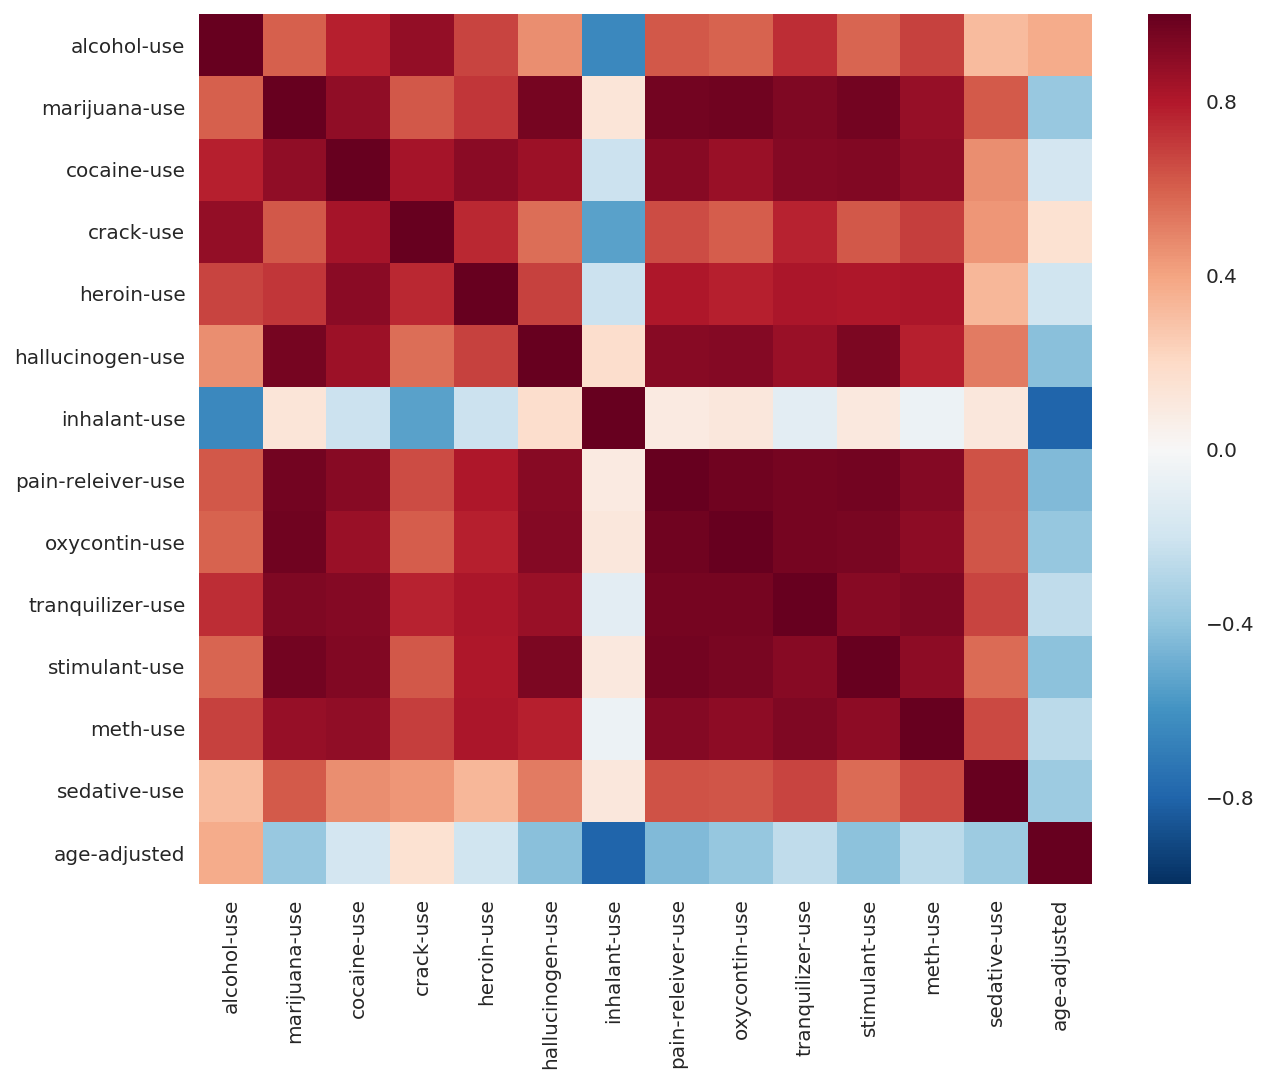

In [67]:
# cross correlation matrix
corr = df_drug_use.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### The correlation coefficients that correspond to the chart above are in the matrix below.

In [69]:
df_drug_use.corr()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,age-adjusted
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268,0.367742
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766,-0.380299
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914,-0.186837
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421,0.148656
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649,-0.200053
hallucinogen-use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700,-0.417828
inhalant-use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611,-0.803968
pain-releiver-use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666,-0.438547
oxycontin-use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929,-0.388914
tranquilizer-use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618,-0.254427


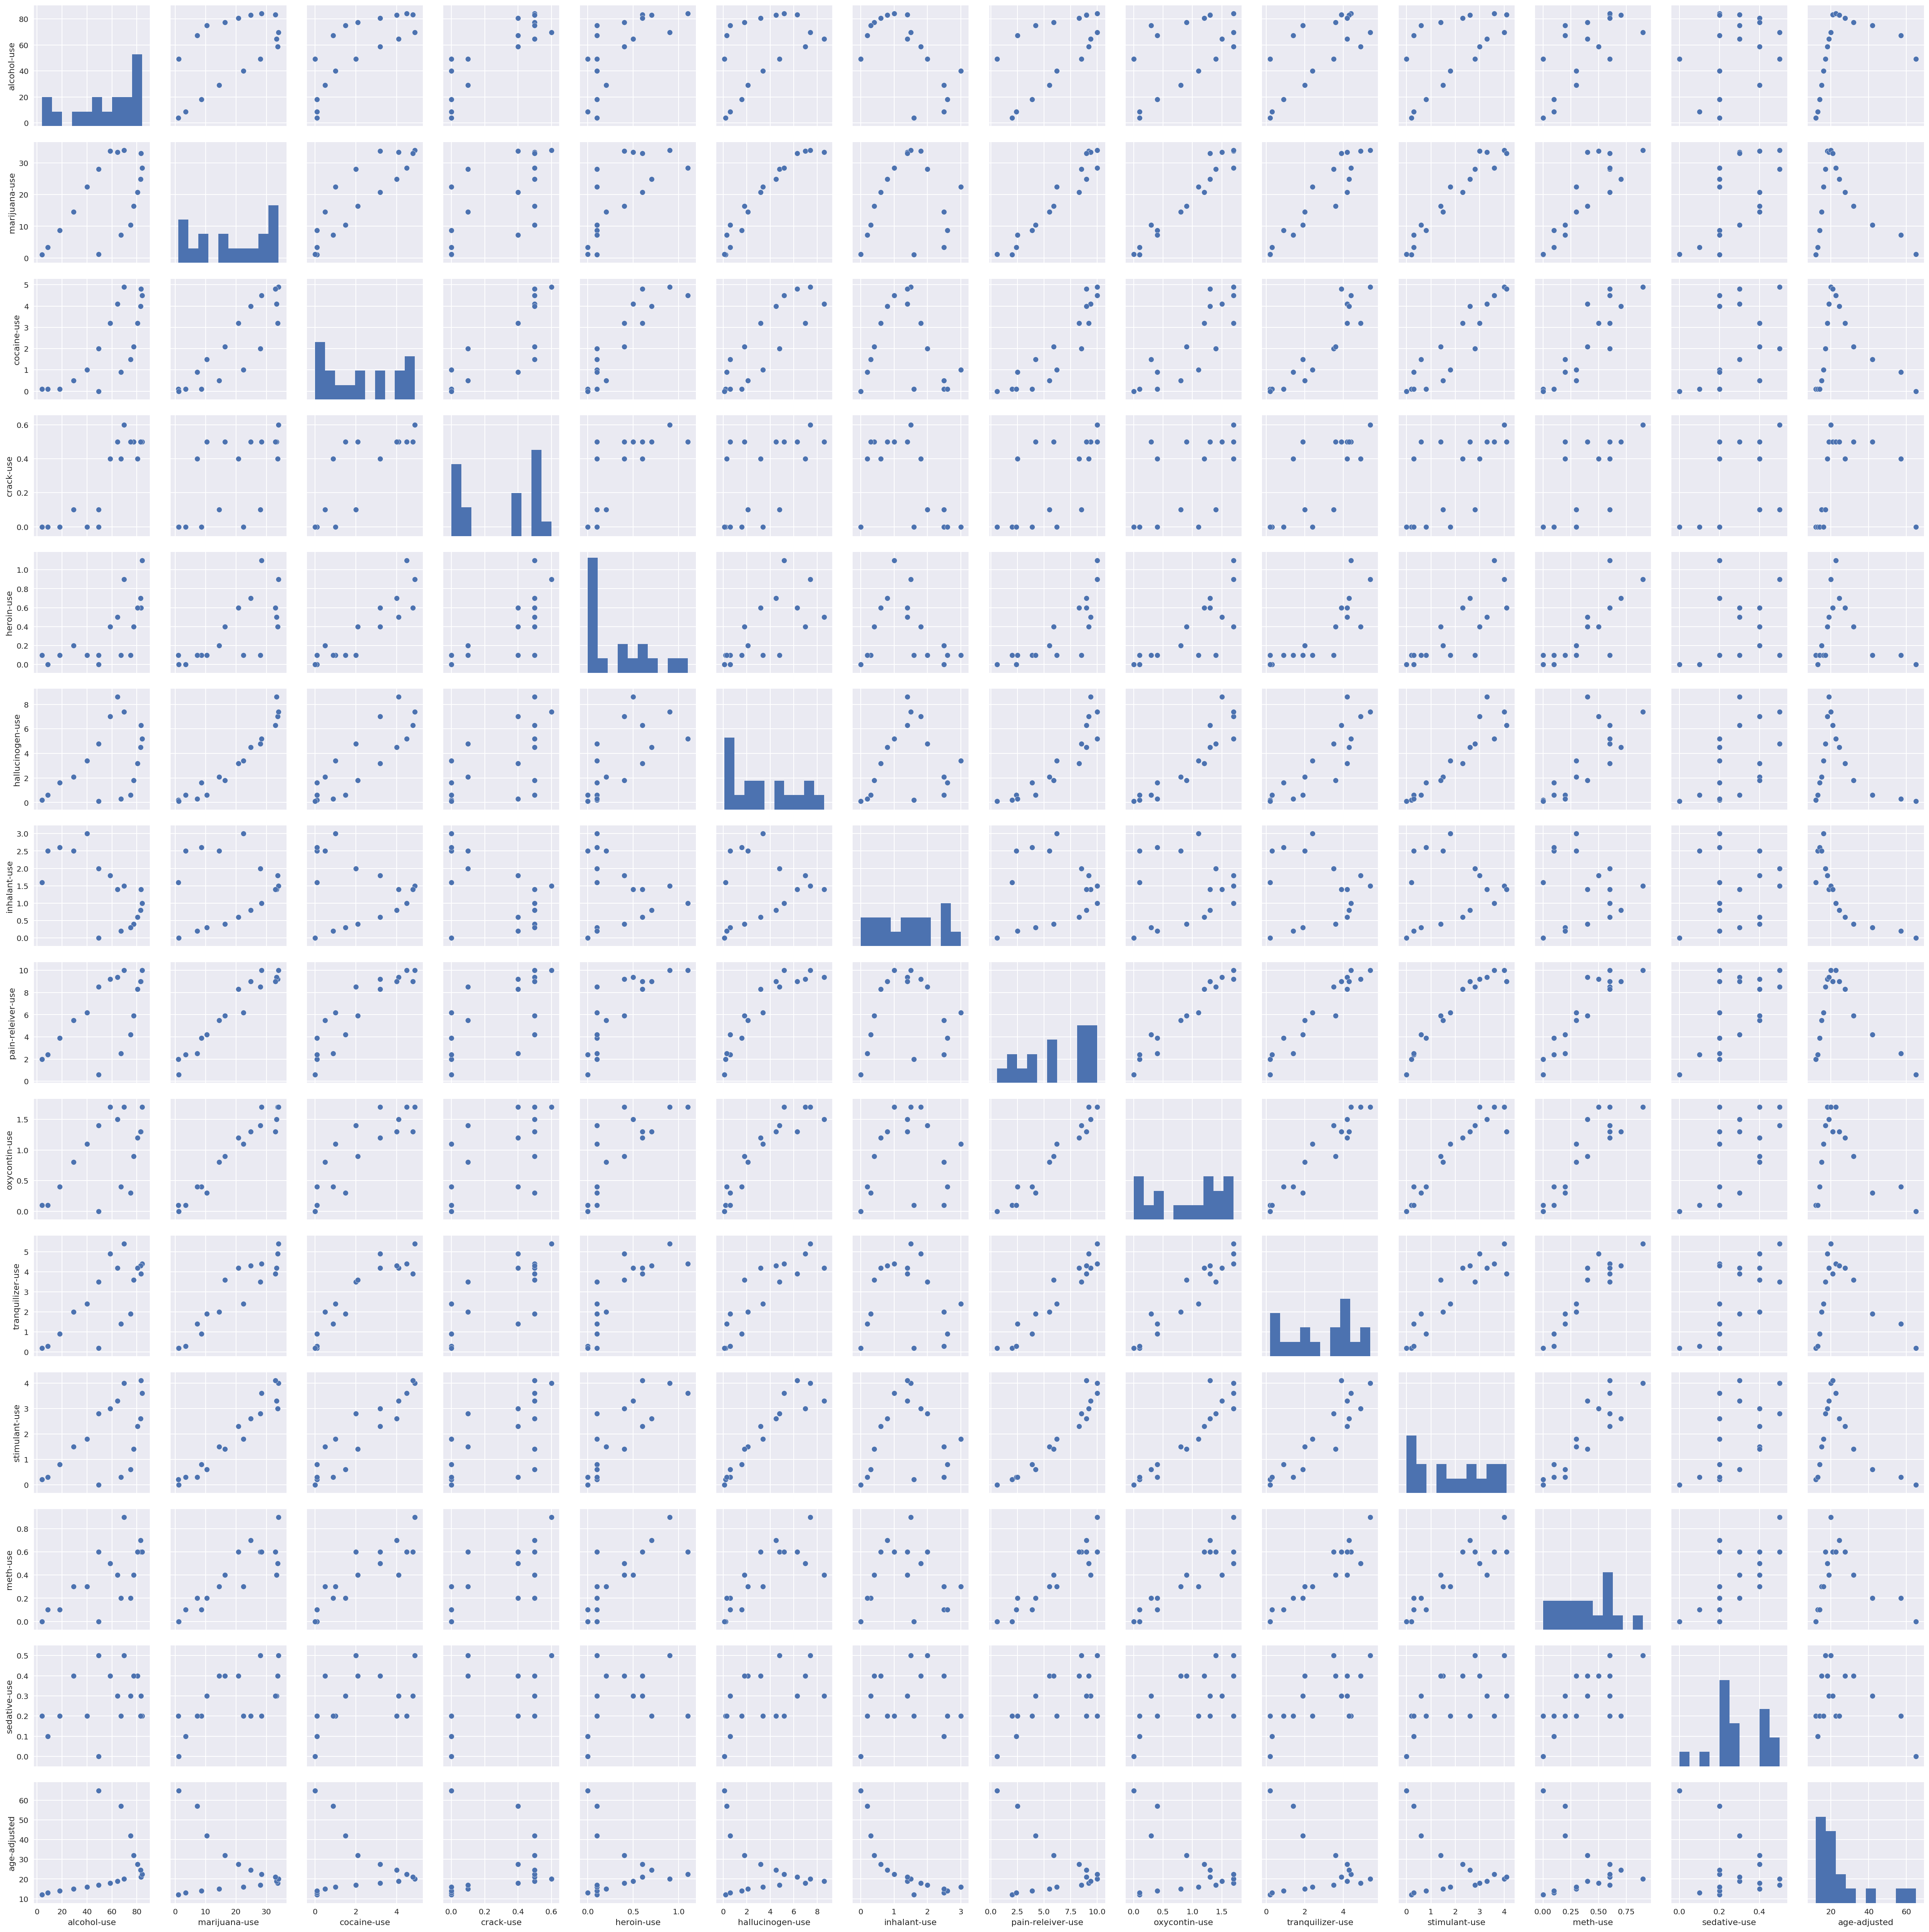

In [70]:
sns.pairplot(df_drug_use)

**Report**

### 1.  Drug use accelerates very rapidly in the mid teens through age 20. 
### 2.  Drug use tails off after age 20, though alcohol use remains very high.
### 3.  There is a high correlation of drug use by type of drug and age.
### 4.  The exception to the above trends is inhalants, as use is greatest among early teens.
### 5.  An effective drug policy requires early age intervention and education.


...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

### Using 2 standard deviations away from the mean as a definition of outlier, we find two states that are outliers on Math:  Ohio at 439 and Iowa at 603.  
### After giving them NaN values in the dataset, we find: the mean of Math shifts only slightly from 531.5 to 531.9,  the Median stays the same at 521 and the standard deviation drops from 36.0 to 32.7.  
### By removing one data point on each extreme, the standard deviation is what changes the most.

In [71]:
df = pd.read_csv('sat_scores.csv')

In [72]:
del df['Rate']

In [73]:
df.head(2)

,State,Verbal,Math
0,CT,509,510
1,NJ,499,513


In [74]:
# https://github.com/pandas-dev/pandas/issues/15111
# for Math:
# if we define an outlier as three standard deviations away from the mean
# we use 3 for the zscore and find that no outliers fit this criteria
df['Math'].where(np.abs(stats.zscore(df['Math'])) > 3).dropna()

Series([], Name: Math, dtype: float64)

In [75]:
# for Math:
# if we define an outlier as two standard deviations away from the mean
# we use 2 for the zscore and find that two outliers (min and max) fit this criteria
df['Math'].where(np.abs(stats.zscore(df['Math'])) > 2).dropna()

27    439.0
47    603.0
Name: Math, dtype: float64

In [76]:
# for Verbal:
# if we define an outlier as two standard deviations away from the mean
# we use 2 for the zscore and find that no outliers fit this criteria

df['Verbal'].where(np.abs(stats.zscore(df['Verbal'])) > 2).dropna()

Series([], Name: Verbal, dtype: float64)

In [77]:
# let's look at mean, median, std before dropping outliers:
df.describe()

,Verbal,Math
count,52.000000,52.000000
mean,532.019231,531.500000
std,33.236225,36.014975
min,482.000000,439.000000
25%,501.000000,504.000000
50%,526.500000,521.000000
75%,562.000000,555.750000
max,593.000000,603.000000


In [78]:
# drop the two outliers:
df.ix[27,'Math'] = None

In [79]:
df.ix[47,'Math'] = None

In [80]:
df.describe()

,Verbal,Math
count,52.000000,50.000000
mean,532.019231,531.920000
std,33.236225,32.724478
min,482.000000,474.000000
25%,501.000000,505.250000
50%,526.500000,521.000000
75%,562.000000,553.750000
max,593.000000,599.000000


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

### From the link above, we learn:
### "The Spearman correlation coefficient is defined as the Pearson correlation coefficient between the ranked variables."

https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php

#### From the link above, we learn:

#### "The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association between two ranked variables."

#### "If a scatterplot shows that the relationship between your two variables looks monotonic you would run a Spearman's correlation because this will then measure the strength and direction of this monotonic relationship. On the other hand if, for example, the relationship appears linear (assessed via scatterplot) you would run a Pearson's correlation because this will measure the strength and direction of any linear relationship. You will not always be able to visually check whether you have a monotonic relationship, so in this case, you might run a Spearman's correlation anyway."

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### California is in the 62nd percentile based on the variable Rate.
### The spearman rank correlation is a correlation of the ordinal ranks of values. This contrasts with the Pearson correlation which is based on the values themselves.  

### This is a really good link for ACT scores and percentiles.
### http://blog.prepscholar.com/how-many-people-get-a-34-35-36-on-the-act-score-breakdown
### 

In [81]:
# NOTE -- IF PULL RATE OUT OF DF IN #8, need to recreate df
# uncomment following code:
df = pd.read_csv('sat_scores.csv')
df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [82]:
df.head(2)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513


In [83]:
len(df)

52

In [84]:
np.percentile(df['Math'], 100)

603.0

In [85]:
type(df['Rate'])

pandas.core.series.Series

In [86]:
df['Rate_Percentiles'] = df['Rate']/np.percentile(df['Rate'], 100)

In [87]:
df['Math_Percentiles'] = df['Math']/np.percentile(df['Math'], 100)

In [88]:
df

,State,Rate,Verbal,Math,Rate_Percentiles,Math_Percentiles
0,CT,82,509,510,1.000000,0.845771
1,NJ,81,499,513,0.987805,0.850746
2,MA,79,511,515,0.963415,0.854063
3,NY,77,495,505,0.939024,0.837479
4,NH,72,520,516,0.878049,0.855721
5,RI,71,501,499,0.865854,0.827529
6,PA,71,500,499,0.865854,0.827529
7,VT,69,511,506,0.841463,0.839138
8,ME,69,506,500,0.841463,0.829187
9,VA,68,510,501,0.829268,0.830846


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

### Percentiles might be useful for dealing with outliers because the spread of the data is reduced to a 1 to 100 scale based on oridinal rank.  
### The percentile distribution looks like a rectangle, as we are dividing the values equally over a set interval.

In [89]:
df_drug_final = pd.read_csv('drug-use-by-age.csv')
df_drug_final.columns

Index([u'age', u'n', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

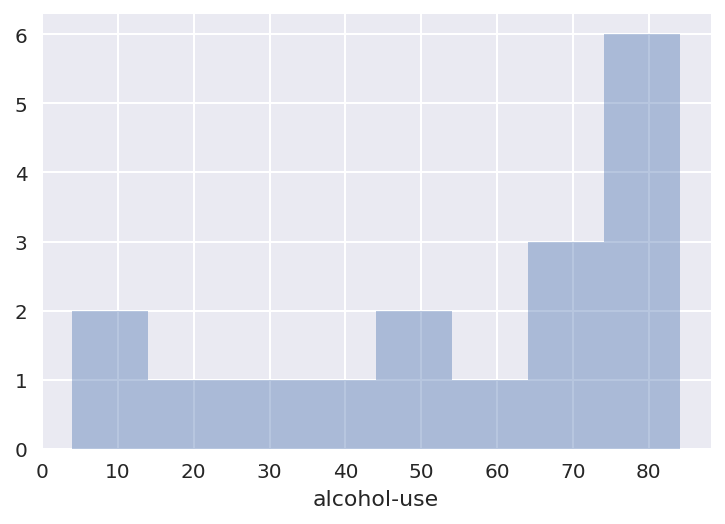

In [90]:
sns.distplot(df_drug_final['alcohol-use'], bins=8, kde=False)

In [91]:
df_drug_final['alcohol-use-percentiles'] = df_drug_final['alcohol-use']/np.percentile(df_drug_final['alcohol-use'], 100)

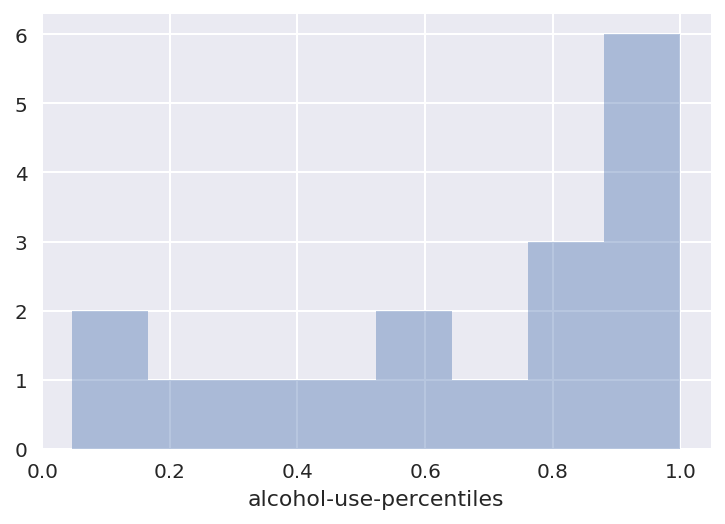

In [92]:
sns.distplot(df_drug_final['alcohol-use-percentiles'], bins=8, kde=False)

In [93]:
alcohol_use_percentiles = [float(x / 16.0) for x in range(1,17)]
print(alcohol_use_percentiles)

[0.0625, 0.125, 0.1875, 0.25, 0.3125, 0.375, 0.4375, 0.5, 0.5625, 0.625, 0.6875, 0.75, 0.8125, 0.875, 0.9375, 1.0]


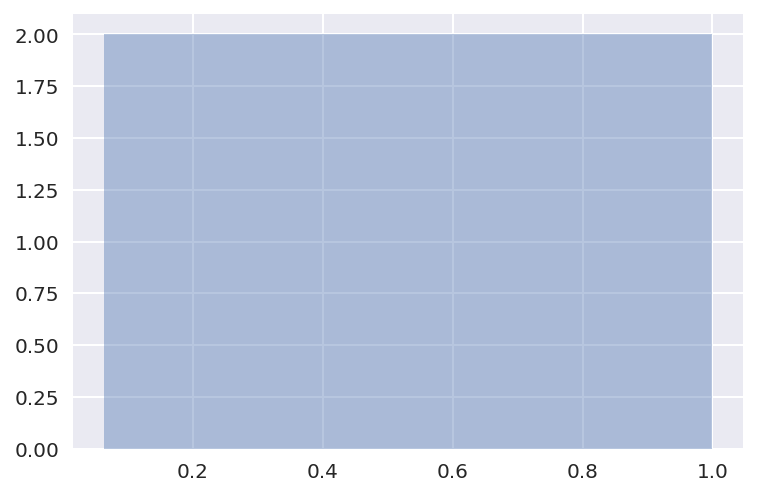

In [94]:
sns.distplot(alcohol_use_percentiles, bins=8, kde=False)